
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [119]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [120]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [121]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [122]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [123]:
## Drop last 2 rows
df.drop(105,axis=0,inplace=True)

In [124]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
106,Perrin Freres monthly champagne sales millions...,NaN


In [125]:
df.drop(106,axis=0,inplace=True)

In [126]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [127]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [128]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [129]:
df.set_index('Month',inplace=True)

In [130]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [131]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

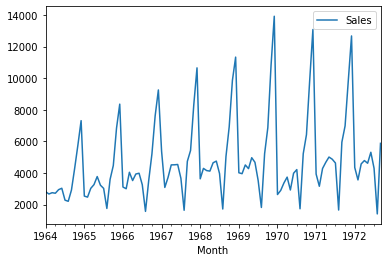

In [132]:
df.plot()

<Figure size 432x288 with 0 Axes>

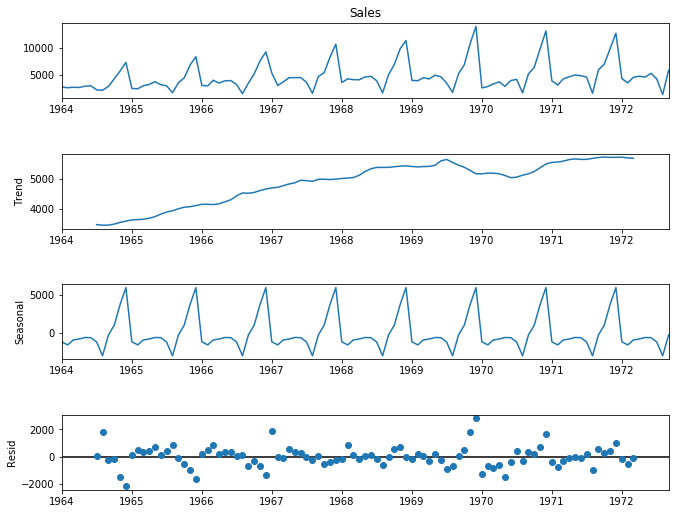

In [133]:
# run a ETF decompose to confirm seasonality and trend.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Sales'], model='add', freq=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,8)

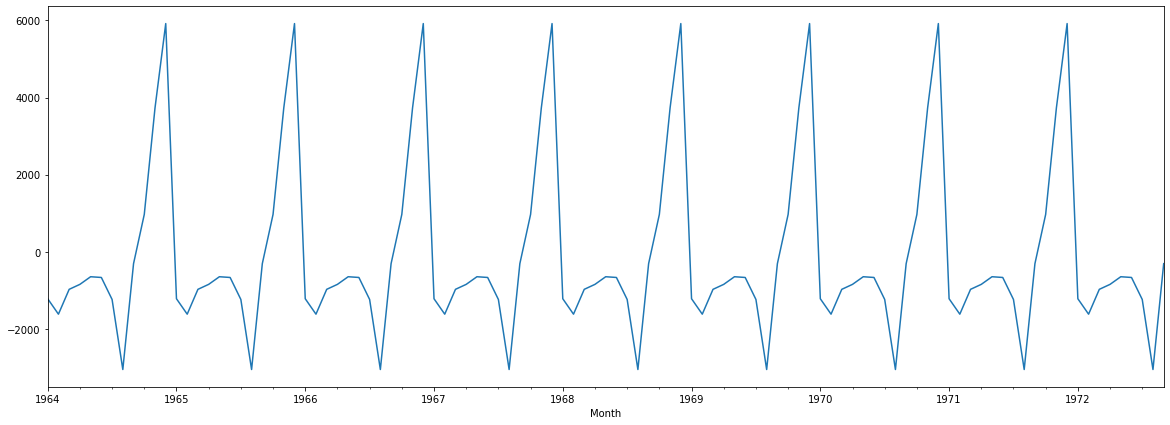

In [156]:
# plot seasonality
result.seasonal.plot(figsize=(20,7))

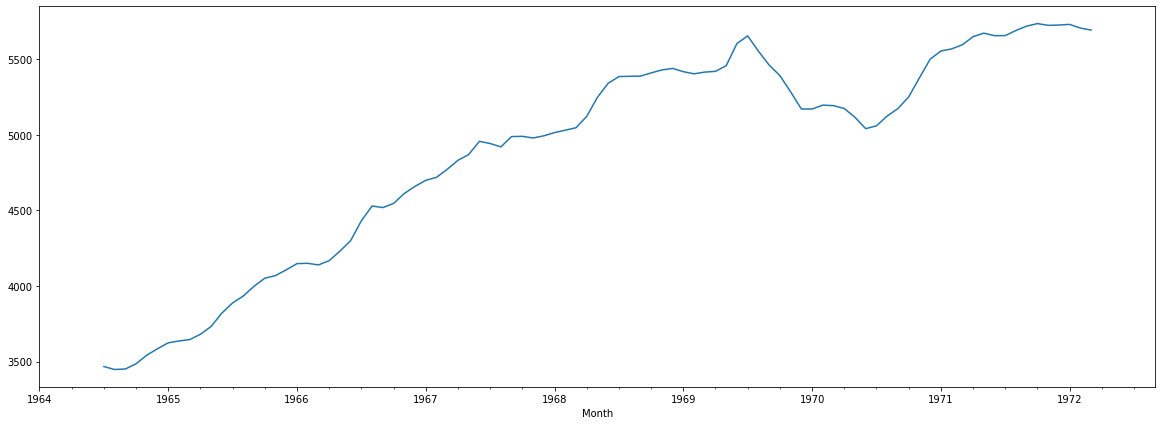

In [157]:
# plot trend
result.trend.plot(figsize=(20,7))

In [134]:
### Apply ADF test to check For Stationarity.
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [135]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [136]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [137]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [138]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [139]:
## Again test dickey fuller test
adfuller_test(df['Sales First Difference'].dropna())
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.1898964480510115
p-value : 2.5196204473869244e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


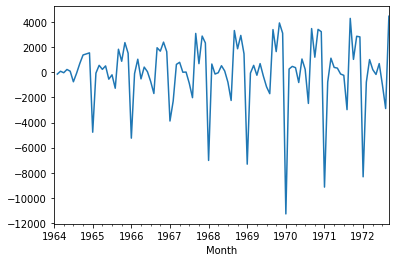

In [140]:
df['Sales First Difference'].plot()

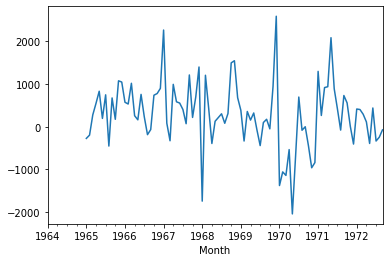

In [141]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
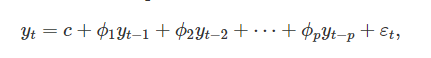

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [142]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

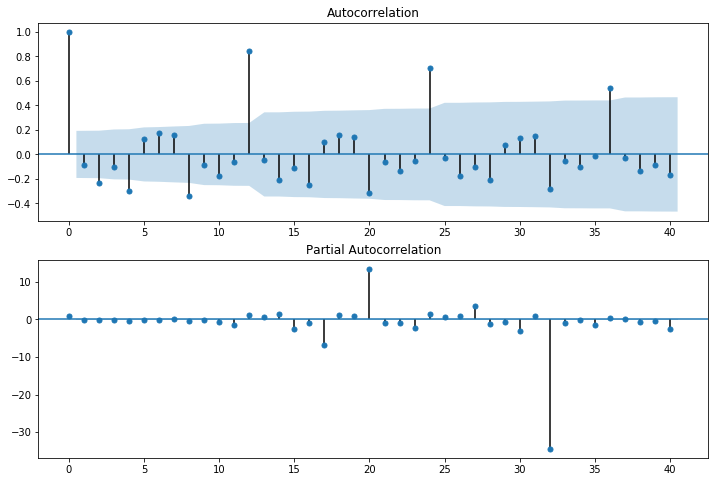

In [143]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales First Difference'].iloc[1:],lags=40,ax=ax2)

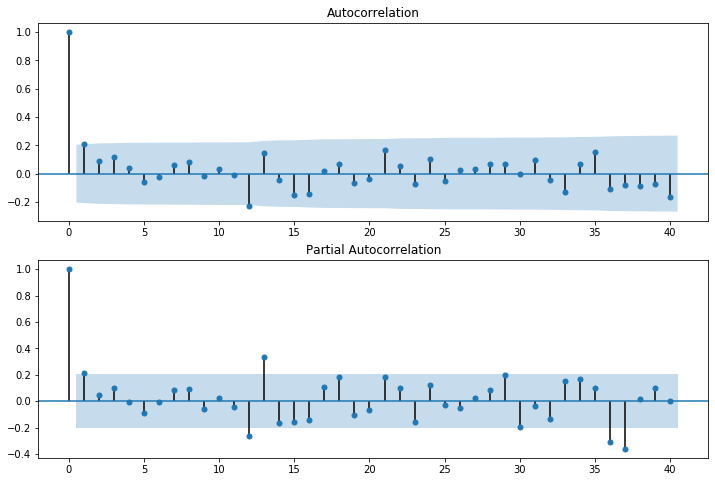

In [144]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

### Parameters by Auto Arima function

In [163]:
from pmdarima import auto_arima
# run auto_arima
auto_arima(df['Seasonal First Difference'].dropna(), seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   93
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -742.176
Date:                            Fri, 27 Mar 2020   AIC                           1492.351
Time:                                    00:02:04   BIC                           1502.482
Sample:                                         0   HQIC                          1496.442
                                             - 93                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    263.7874     89.090      2.961      0.003      89.174     438.400
ar.L1          0.2881      0.067      4.327      0.000       0.158       0.419
ar.S.L12      -0.2920      0.098     -2.991      0.003      -0.483      -0.101
sigma2      4.941e+05   5.49e+04      9.006      0.000    3.87e+05    6.02e+05
===================================================================================
Ljung-Box (Q):                       32.67   Jarque-Bera (JB):                12.72
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.23
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA Model

In [145]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [146]:
model=ARIMA(df['Sales'],order=(0,1,1))
model_fit=model.fit()

In [147]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -965.924
Method:                       css-mle   S.D. of innovations           2613.754
Date:                Thu, 26 Mar 2020   AIC                           1937.848
Time:                        23:48:34   BIC                           1945.781
Sample:                    02-01-1964   HQIC                          1941.062
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.2930    199.305      0.107      0.915    -369.338     411.924
ma.L1.D.Sales    -0.2248      0.188     -1.195      0.232      -0.593       0.144
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.4485           +0.0000j            4.4485            0.0000
-----------------------------------------------------------------------------
"""

Clearly shows that ARIMA should not be used for seasonal data as the predictions are not right.

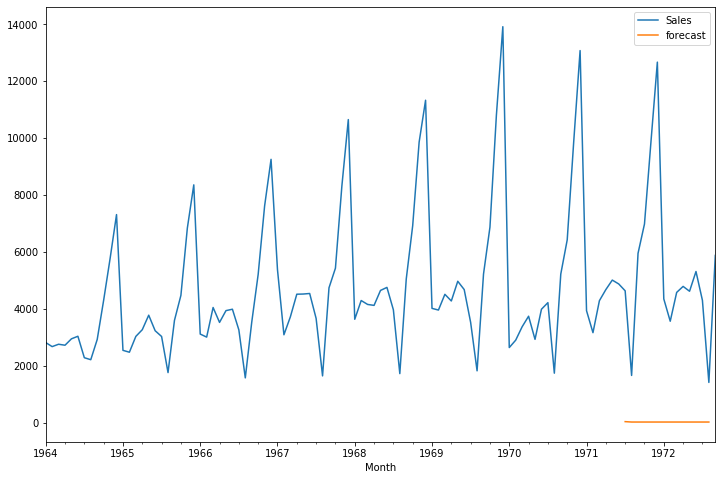

In [148]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

### SARIMA Model trying with three different combinations of AR(p), I(d), MA(q).

1490.5165937154832


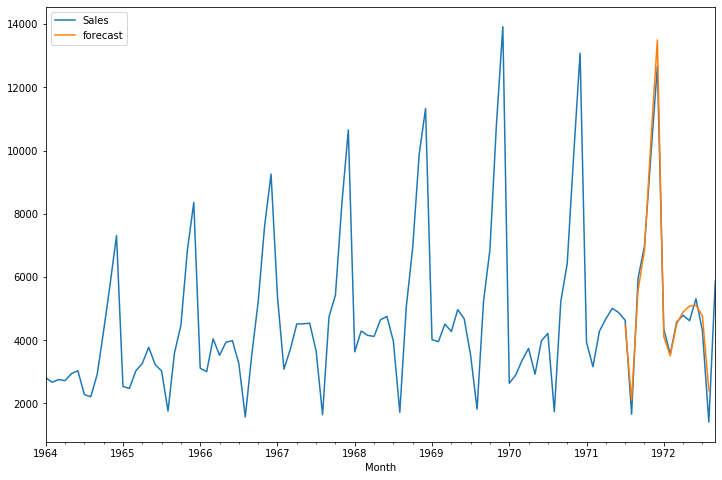

In [149]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()
print(results.aic)
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

1486.8041358152411


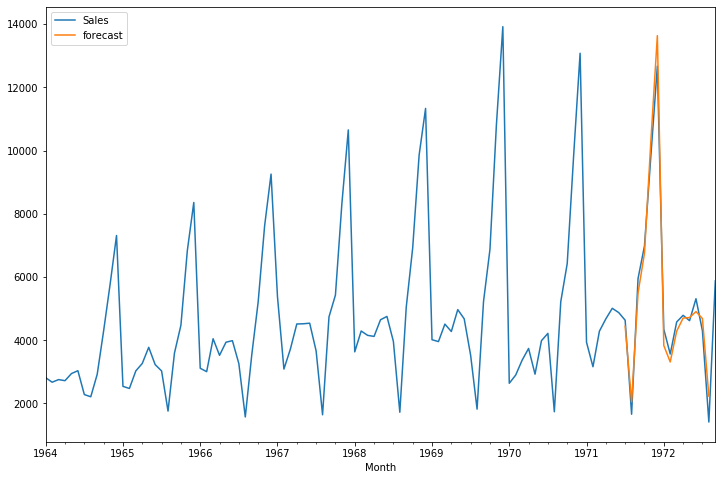

In [150]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
print(results.aic)
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

1735.002106913588


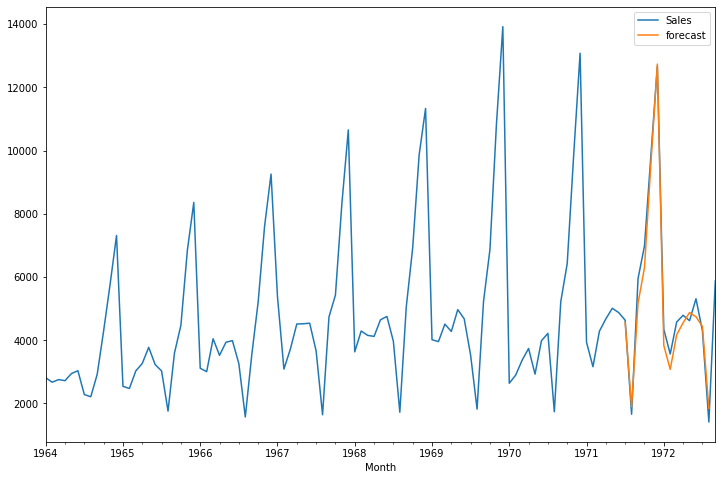

In [164]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 0, 0),seasonal_order=(1,0,0,12))
results=model.fit()
print(results.aic)
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [151]:
# Create the data for next 24 months ready for forecasting
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [152]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [153]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [154]:
future_df=pd.concat([df,future_datest_df])

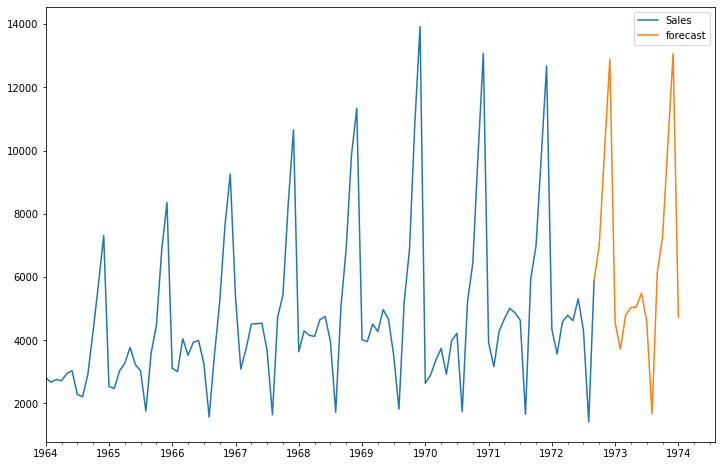

In [155]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 